# Linear Algebra: Least Squares and Regression

This notebook generates visualizations for least squares regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## Simple Linear Regression

Fitted line: y = 2.1217x + 3.0491
True parameters: y = 2.5x + 1.5


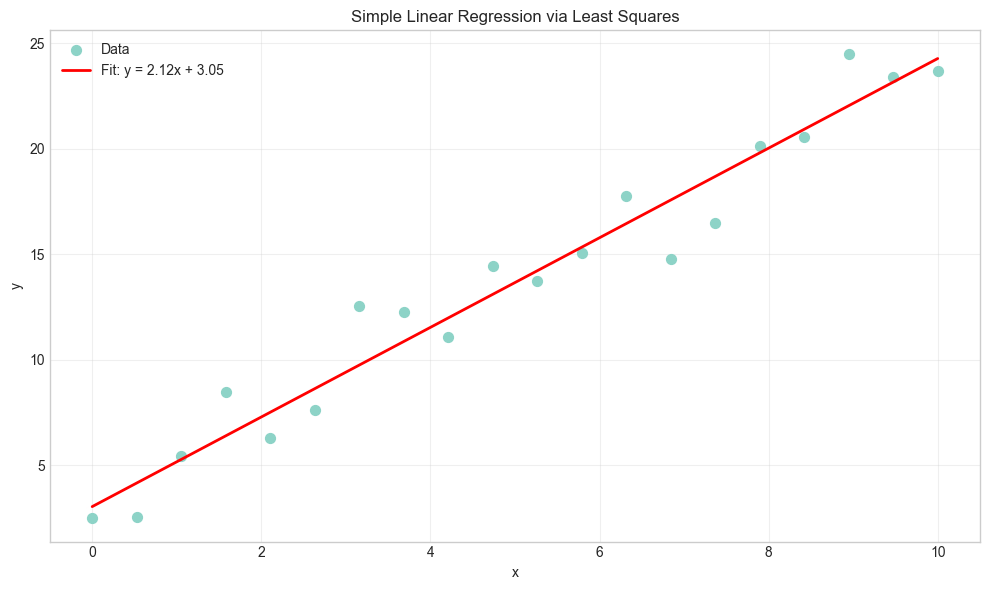

In [2]:
def least_squares_normal(A, b):
    """Solve least squares using normal equations."""
    ATA = A.T @ A
    ATb = A.T @ b
    return np.linalg.solve(ATA, ATb)

# Generate noisy data
np.random.seed(42)
x_data = np.linspace(0, 10, 20)
y_data = 2.5 * x_data + 1.5 + np.random.randn(20) * 2

# Set up the design matrix A = [x, 1]
A = np.column_stack([x_data, np.ones_like(x_data)])
b = y_data

# Solve using normal equations
coeffs = least_squares_normal(A, b)
m, c = coeffs

print(f"Fitted line: y = {m:.4f}x + {c:.4f}")
print(f"True parameters: y = 2.5x + 1.5")

# Visualize the fit
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', s=50)
x_line = np.linspace(0, 10, 100)
y_line = m * x_line + c
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Fit: y = {m:.2f}x + {c:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression via Least Squares')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/linear-regression.png', dpi=150, bbox_inches='tight')
plt.show()

## Polynomial Regression

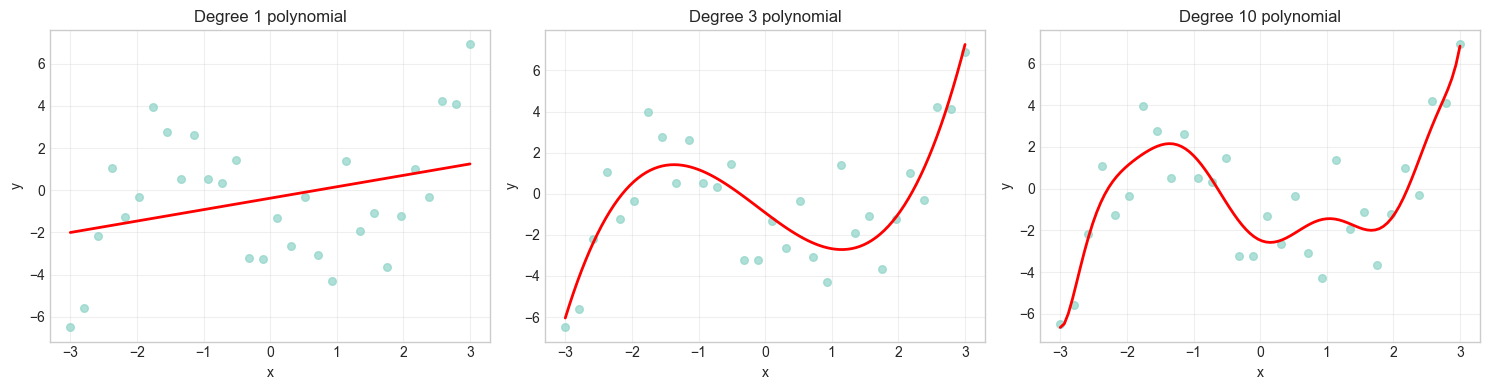

In [3]:
# Generate nonlinear data
np.random.seed(42)
x_data = np.linspace(-3, 3, 30)
y_data = 0.5*x_data**3 - 2*x_data + np.random.randn(30) * 2

def fit_polynomial(x, y, degree):
    """Fit a polynomial of given degree using least squares."""
    A = np.column_stack([x**i for i in range(degree + 1)])
    coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
    return coeffs

# Fit polynomials of different degrees
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
degrees = [1, 3, 10]

for ax, deg in zip(axes, degrees):
    coeffs = fit_polynomial(x_data, y_data, deg)
    x_plot = np.linspace(-3, 3, 100)
    y_plot = sum(c * x_plot**i for i, c in enumerate(coeffs))

    ax.scatter(x_data, y_data, s=30, alpha=0.7)
    ax.plot(x_plot, y_plot, 'r-', linewidth=2)
    ax.set_title(f'Degree {deg} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/polynomial-regression.png', dpi=150, bbox_inches='tight')
plt.show()

## Residual Analysis

R-squared: 0.958239


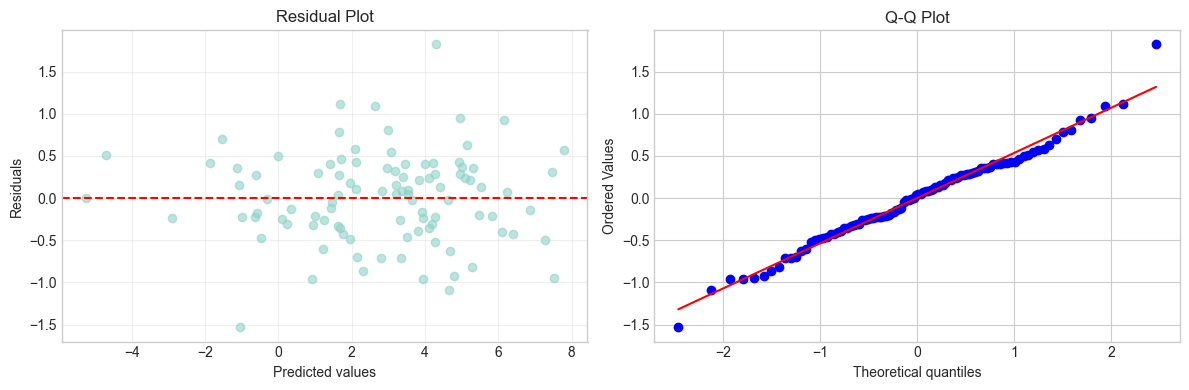

In [4]:
# Generate data with two features
np.random.seed(42)
n_samples = 100

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 3 + 2*x1 - 1.5*x2 + np.random.randn(n_samples) * 0.5

# Design matrix
A = np.column_stack([np.ones(n_samples), x1, x2])

# Fit model
x_ls = least_squares_normal(A, y)
y_pred = A @ x_ls
residuals = y - y_pred

# Compute R-squared
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - ss_res / ss_tot
print(f"R-squared: {r_squared:.6f}")

# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residual plot
axes[0].scatter(y_pred, residuals, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].grid(True, alpha=0.3)

# QQ plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.savefig('../../static/img/post/linear-algebra/residual-analysis.png', dpi=150, bbox_inches='tight')
plt.show()